In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [16]:
df = pd.read_csv("statistics.csv", sep = '\s*,\s*', engine = 'python')

if not os.path.exists("../images"):
    os.makedirs("../images")

In [3]:
df.head()

,name,bugs,security_hotspots,code_smells,complexity,duplicated_lines,debt
0,p0,17,2,448,596,3.4,4062
1,p1,16,6,320,607,0.0,3347
2,p2,6,4,340,360,8.2,3177
3,p3,15,5,318,434,0.0,3034
4,p4,13,0,328,393,4.6,3039


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               95 non-null     object 
 1   bugs               95 non-null     int64  
 2   security_hotspots  95 non-null     int64  
 3   code_smells        95 non-null     int64  
 4   complexity         95 non-null     int64  
 5   duplicated_lines   95 non-null     float64
 6   debt               95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.3+ KB


In [5]:
df.describe()

,bugs,security_hotspots,code_smells,complexity,duplicated_lines,debt
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,18.842105,8.115789,366.694737,701.168421,5.540000,3696.421053
std,11.259337,13.834787,153.865240,824.341912,6.201825,1509.230701
min,0.000000,0.000000,151.000000,169.000000,0.000000,1349.000000
25%,12.500000,2.000000,255.500000,511.000000,2.500000,2632.500000
50%,17.000000,5.000000,325.000000,607.000000,4.200000,3463.000000
75%,22.500000,9.500000,442.000000,736.000000,6.950000,4439.500000
max,74.000000,123.000000,836.000000,8441.000000,50.600000,8170.000000


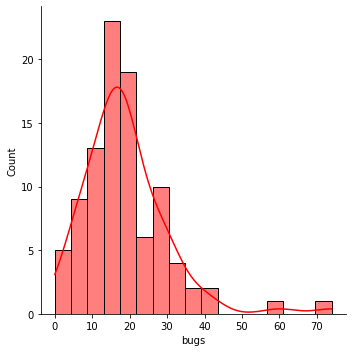

In [19]:
sns.displot(df, x = 'bugs',kde=True,color ='red')
plt.savefig('../images/hist_age.pdf', format='pdf')


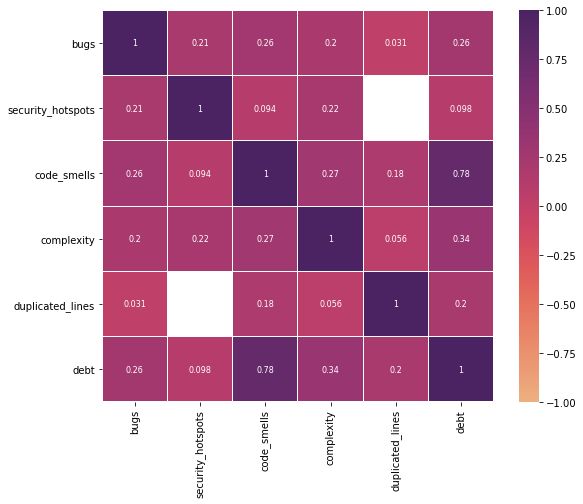

In [17]:
#correlação entre variáveis.
corr = df.corr("kendall")
plt.figure(figsize = (10,8))
sns_plot = sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
                       cmap = 'flare', vmax = 1, vmin = -1.0, linewidths = 0.1, annot = True, annot_kws = {"size":8}, square = True)

plt.gcf().subplots_adjust(bottom=0.20)
plt.gcf().subplots_adjust(left=0.20)
plt.savefig('../images/heatmap.eps', format='eps')


<Figure size 3600x720 with 0 Axes>

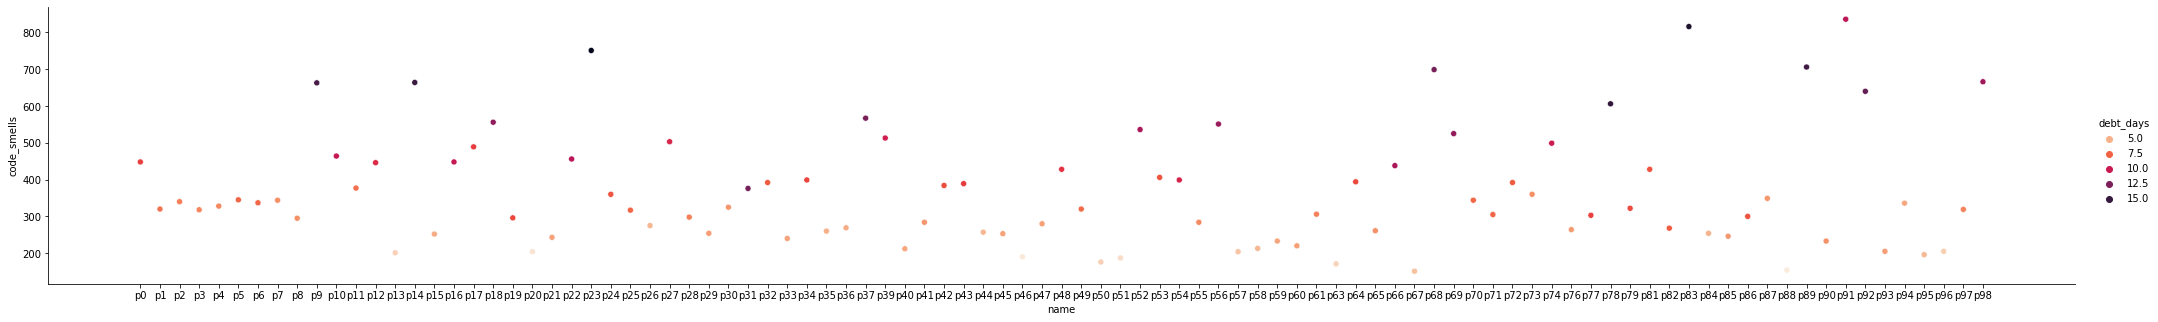

In [23]:

#sns.displot(x = 'name', y='code_smells', data = df)
df["debt_days"]=(df["debt"] / 60)/8
plt.figure(figsize = (50,10))
sns.relplot(
    data=df,
    x="name", y="code_smells",hue="debt_days",aspect=6,palette="rocket_r"
)
plt.gcf().subplots_adjust(left=0.05)
plt.gcf().subplots_adjust(bottom=0.20)

plt.savefig('../images/code_smells_Time.eps', format='eps')




In [24]:
df.describe()

,bugs,security_hotspots,code_smells,complexity,duplicated_lines,debt,debt_days
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,18.842105,8.115789,366.694737,701.168421,5.540000,3696.421053,7.700877
std,11.259337,13.834787,153.865240,824.341912,6.201825,1509.230701,3.144231
min,0.000000,0.000000,151.000000,169.000000,0.000000,1349.000000,2.810417
25%,12.500000,2.000000,255.500000,511.000000,2.500000,2632.500000,5.484375
50%,17.000000,5.000000,325.000000,607.000000,4.200000,3463.000000,7.214583
75%,22.500000,9.500000,442.000000,736.000000,6.950000,4439.500000,9.248958
max,74.000000,123.000000,836.000000,8441.000000,50.600000,8170.000000,17.020833
